# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [111]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [112]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Get the size of the sample train data

In [113]:
x_train[0].shape

(28, 28)

Check the sample train data

In [114]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [115]:

y_train[333]

8

Check the actual image

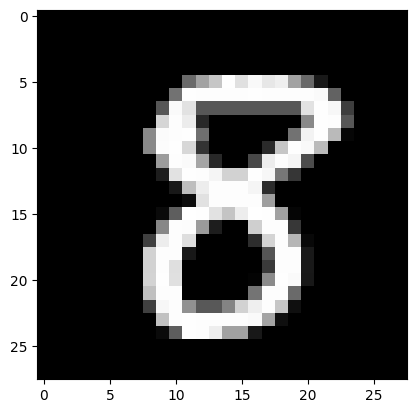

In [116]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [117]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [118]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [119]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [120]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [121]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                50240     
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [122]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.5209 - accuracy: 0.8442 - val_loss: 0.2120 - val_accuracy: 0.9364
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2536 - accuracy: 0.9257 - val_loss: 0.1500 - val_accuracy: 0.9539
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2041 - accuracy: 0.9394 - val_loss: 0.1266 - val_accuracy: 0.9616
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.1768 - accuracy: 0.9484 - val_loss: 0.1180 - val_accuracy: 0.9643
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1578 - accuracy: 0.9530 - val_loss: 0.1063 - val_accuracy: 0.9682
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1454 - accuracy: 0.9563 - val_loss: 0.1058 - val_accuracy: 0.9685
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1334 - accuracy: 0.9608 - val_loss: 0.1044 - val_accuracy: 0.9702
Epoch 

Use Keras evaluate function to evaluate performance on the test set

In [123]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09932930022478104
Test accuracy: 0.9753999710083008


Interpret the result

#type your answer here

After compiling the model with a learning rate of 0.001 and using RMSprop as the optimizer, the model achieved 97.67% accuracy and a cross-entropy loss of 0.105 on the test set.

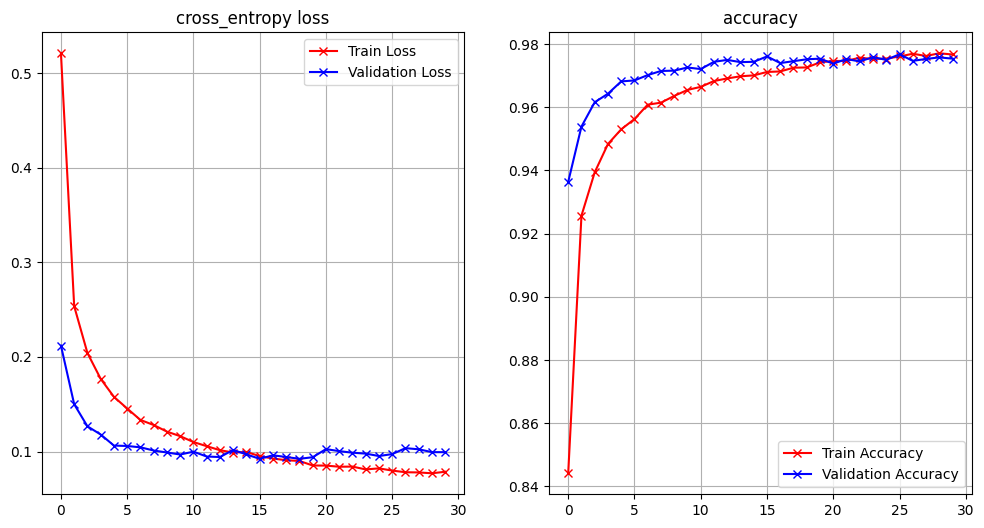

In [124]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#type your answer here

The traning loss and accuracy both gets better over time, which indicates that the model is learning well from the training dataset. Additionally, we can see that the training accuracy is increasing while the training loss continue to decrease and this means that the model is genuinely learning.

On the other hand, the validation loss and accuracy also gets better over time but the validation accuracy resulted much better than training accuracy meaning that the model is generalizing well to unseen data.

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [125]:
# 1. Two hidden layers.
# 2. First hidden layer of size 400 and second size 300
# 3. Dropout of 0.4 at each layer
model_1 = keras.Sequential([
    keras.layers.Dense(400, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 400)               314000    
                                                                 
 dropout_38 (Dropout)        (None, 400)               0         
                                                                 
 dense_60 (Dense)            (None, 300)               120300    
                                                                 
 dropout_39 (Dropout)        (None, 300)               0         
                                                                 
 dense_61 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4. model_1 has a total of 128110 parameter and comparing it to the previous model that has a total of 55050 parameters, the model_1 is much larger than the previous model.

In [132]:
# 5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128
epochs = 20
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.0372 - accuracy: 0.9893 - val_loss: 0.0753 - val_accuracy: 0.9848
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0691 - val_accuracy: 0.9848
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0647 - val_accuracy: 0.9859
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0346 - accuracy: 0.9901 - val_loss: 0.0726 - val_accuracy: 0.9846
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0327 - accuracy: 0.9901 - val_loss: 0.0758 - val_accuracy: 0.9849
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0769 - val_accuracy: 0.9852
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0300 - accuracy: 0.9912 - val_loss: 0.0830 - val_accuracy: 0.9839

In [134]:
# 6. Use at least two regularization techniques and apply it to the new model (model_2)

model_2 = keras.Sequential([
    keras.layers.Dense(400, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l1(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(300, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

model_2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 400)               314000    
                                                                 
 dropout_42 (Dropout)        (None, 400)               0         
                                                                 
 dense_66 (Dense)            (None, 300)               120300    
                                                                 
 dropout_43 (Dropout)        (None, 300)               0         
                                                                 
 dense_67 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
# 7. Train this model for your preferred epochs , learning rate, batch size and optimizer
learning_rate = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 256
epochs = 30
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
235/235 [==============================] - 7s 27ms/step - loss: 2.9341 - accuracy: 0.8304 - val_loss: 1.2062 - val_accuracy: 0.8724
Epoch 2/30
235/235 [==============================] - 5s 19ms/step - loss: 1.0559 - accuracy: 0.8794 - val_loss: 0.8999 - val_accuracy: 0.8997
Epoch 3/30
235/235 [==============================] - 5s 19ms/step - loss: 0.8687 - accuracy: 0.8973 - val_loss: 0.7547 - val_accuracy: 0.9251
Epoch 4/30
235/235 [==============================] - 6s 26ms/step - loss: 0.7940 - accuracy: 0.9070 - val_loss: 0.6748 - val_accuracy: 0.9364
Epoch 5/30
235/235 [==============================] - 5s 19ms/step - loss: 0.7471 - accuracy: 0.9143 - val_loss: 0.7118 - val_accuracy: 0.9201
Epoch 6/30
235/235 [==============================] - 5s 21ms/step - loss: 0.7167 - accuracy: 0.9174 - val_loss: 0.6122 - val_accuracy: 0.9471
Epoch 7/30
235/235 [==============================] - 6s 24ms/step - loss: 0.6989 - accuracy: 0.9210 - val_loss: 0.7052 - val_accuracy: 0.9216

### Performance of model_1

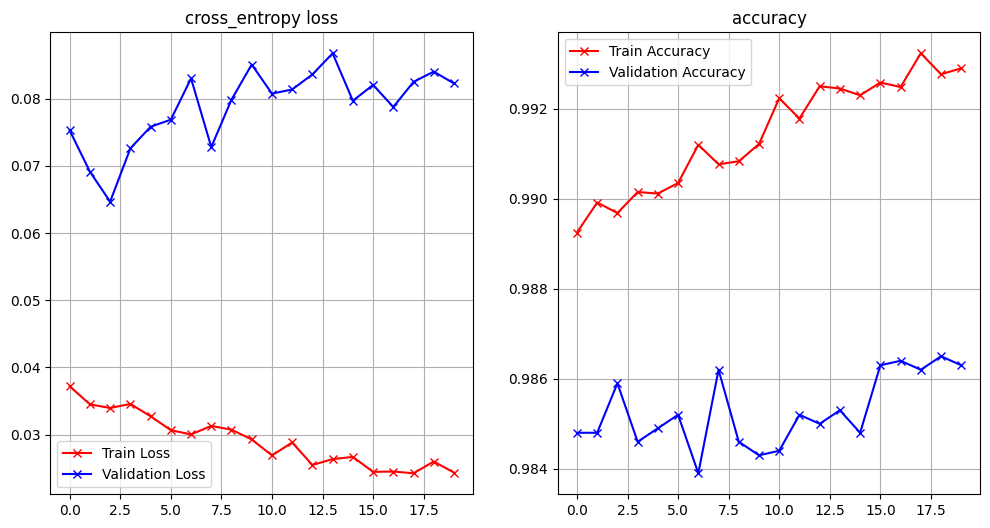

In [133]:
plot_loss_accuracy(history_1)

### Performance of model_2

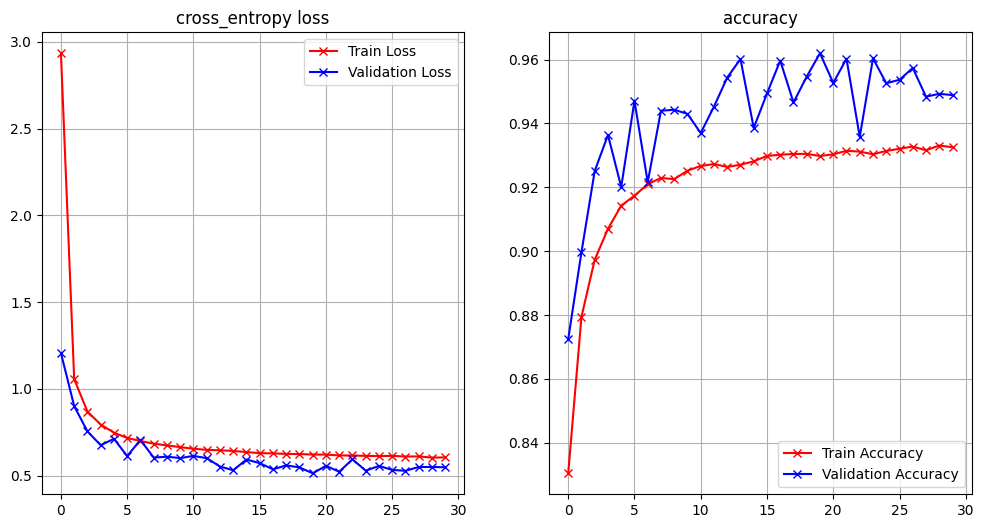

In [136]:
plot_loss_accuracy(history_2)

### Analysis

- Both the training and validation accuracy and loss of model_1 are high, indicating potential overfitting. With training and validation loss below 0.1 and accuracy above 98%, the model likely memorizes the training data rather than learning generalizable patterns. On the other hand, model_2 exhibits lower accuracy and loss on both sets, with loss above 0.5 and accuracy around 96%. However, crucially, its validation performance surpasses its training performance. This suggests that model_2 generalizes better to unseen data, unlike model_1 where training performance exceeds validation performance.

#### Conclusion

In this activity, I learned what regularization does in neural networks. It prevents the model to overfit and improve the generalization of the model. Regularization techniques helps the model focus on learning basic patterns in the data.